<img style="float:left" width="70%" src="../../documentacion/imagenes/escudo_COLOR_1L_DCHA.png">
<img style="float:right" width="10%" src="../../documentacion/imagenes/PythonLogo.svg">
<br style="clear:both;">


<h2 style="display: inline-block; padding: 4mm; padding-left: 2em; background-color: navy; line-height: 1.3em; color: white; border-radius: 10px;">8. Deep Learning</h2>


 
## Estudiante:

- Jose Luis Perez Gomez

In [20]:
%run Importaciones.ipynb
%run Variables_Clases.ipynb

In [71]:
experimento_1_nor = pd.read_csv('../datos/experimento_1.csv', sep=',')
experimento_2_nor = pd.read_csv('../datos/experimento_2.csv', sep=',')
experimento_3_nor = pd.read_csv('../datos/experimento_3.csv', sep=',')
experimento_4_nor = pd.read_csv('../datos/experimento_4.csv', sep=',')
experimento_all_nor = pd.read_csv('../datos/experimento_all.csv', sep=',')

experimentos_nor = [experimento_1_nor, experimento_2_nor, experimento_3_nor, experimento_4_nor]
experimentos_name = {'experimento_1':experimento_1_nor, 'experimento_2':experimento_2_nor, 'experimento_3':experimento_3_nor,'experimento_4':experimento_4_nor}


 # MLP Cassifier

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV


model = MLPClassifier(max_iter=200)

n_folds = 10

experimentos = [("Exp1", experimento_1_nor), 
                ("Exp2", experimento_2_nor), 
                ("Exp3", experimento_3_nor), 
                ("Exp4", experimento_4_nor),
                ("Exp5", experimento_all_nor)]


# Defino los rangos de parámetros para MLP
param_grid_mlp = {
    'alpha': np.linspace(0.00001, 0.1, 10),  # Rango de valores para alpha
    'hidden_layer_sizes': [(50,), (100,), (200,), (500,), (1000,)]  # Rango de valores para neuronas en la capa oculta
}

grid_search_mlp = GridSearchCV(model, param_grid_mlp, cv=n_folds)

inicio_tiempo = time.time()

for dataset_name, dataset in experimentos:
    
    
    y = dataset['Key'].values
    X = dataset.drop(columns=['Timestamp','Key']).values
   
    
    # Se dividen los datos. X_train_val sera el 90% de los datos y X_test el 10%
    X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, random_state=SEED, train_size=TRAIN)
    
    # Se dividen los datos. X_train sera el 90% de los datos de X_train_val y X_val el restante 10%
    X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, random_state=SEED,  train_size=TRAIN)
    
    
    # Entrenar modelo
    grid_search_mlp.fit(X_train, y_train)
          
    y_predict_model = grid_search_mlp.best_estimator_.predict(X_val)
    
    
    print('y_val')
    print(y_val)
    print('y_predict_model')
    print(y_predict_model)
    
    #scores = get_cv_results(grid_search_mlp.best_estimator_, y_val, y_predict_model, n_folds)
    
    mlp = accuracy_score(y_val, y_predict_model)
    
    print(dataset_name)

    print('accuracy_score:')
    print(mlp)
        
    report = classification_report(y_val, y_predict_model)
    print('Classification Report:')
    print(report)
        
    matriz_confusion = confusion_matrix(y_val, y_predict_model)
    print('Matrix:')
    print(matriz_confusion)
    print('********************************************************')


fin_tiempo = time.time()

tiempo_utilizado = fin_tiempo - inicio_tiempo

# Convierto el tiempo a horas, minutos y segundos para saber cuanto tarda la ejecucion
horas = int(tiempo_utilizado // 3600)
minutos = int((tiempo_utilizado % 3600) // 60)
segundos = int(tiempo_utilizado % 60)
print(f"Tiempo: {horas} : {minutos} : {segundos}")

In [26]:


# Plot del training loss y accuracy
def print_chart(title, xaxis, yaxis, lines_values, lines_titles):
    """
    Visualización de la pérdida
    IN: title - título de la gráfica
        xaxis - título del eje X
        yaxis - título del eje Y
        lines - lista de series de valores
    """
    for line in lines_values:
        plt.plot(line)
    plt.title(title)
    plt.xlabel(xaxis)
    plt.ylabel(yaxis)
    plt.legend(lines_titles, loc='best')
    plt.show()
    

class PlotLearning(Callback):
    """
    Callback para plotear las métricas durante el entrenamiento.
    """
    def __init__(self, showLR=False):
      self.showLR = showLR              

    def on_train_begin(self, logs={}):
        self.metrics = {}
        for metric in logs:
            self.metrics[metric] = []
            

    def on_epoch_end(self, epoch, logs={}):
        for metric in logs:
            if metric in self.metrics:
                self.metrics[metric].append(logs.get(metric))
            else:
                self.metrics[metric] = [logs.get(metric)]
        
        metric = [x for x in logs if ('val' not in x) and ('lr' not in x)]
        if self.showLR:
          metric.append('lr')
        
        f, axs = plt.subplots(1,len(metric),figsize=(10,4))
        clear_output(wait=True)
        for i,ax in enumerate(axs):
          ax.plot(range(1, epoch + 2), self.metrics[metric[i]],'o--',label=metric[i])
          try:
            ax.plot(range(1, epoch + 2), self.metrics['val_' + metric[i]], 'o--', label='val_' + metric[i])
          except:
            pass
          ax.set_xlabel('# epochs')
          ax.set_ylabel(metric[i])
          ax.legend()
          ax.grid()

        plt.tight_layout()
        plt.show()
        
class TimerCallback(Callback):
    
    def on_train_begin(self, logs={}):
        self.times = []
        self.start_time = time.time()

    def on_epoch_end(self, batch, logs={}):
        self.times.append(time.time() - self.start_time)
        print(f"Tiempo requerido: {self.times[-1]:.2f} segundos.")
        
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, Callback, ModelCheckpoint
import os

# Simple RNN (Simple Recurrent Neural Networks)

In [51]:
experimento_1_nor_scaler = pd.read_csv('../datos/experimento_stscaler_1.csv', sep=',')
experimento_2_nor_scaler = pd.read_csv('../datos/experimento_stscaler_1.csv', sep=',')
experimento_3_nor_scaler = pd.read_csv('../datos/experimento_stscaler_1.csv', sep=',')
experimento_4_nor_scaler = pd.read_csv('../datos/experimento_stscaler_1.csv', sep=',')
experimento_all_nor_scaler = pd.read_csv('../datos/experimento_stscaler_all.csv', sep=',')

#experimentos_nor = [experimento_1_nor, experimento_2_nor, experimento_3_nor, experimento_4_nor]
#experimentos_name = {'experimento_1':experimento_1_nor, 'experimento_2':experimento_2_nor, 'experimento_3':experimento_3_nor,'experimento_4':experimento_4_nor}


In [52]:
experimento_1_scaler = experimento_1_nor_scaler.drop(['Timestamp'], axis=1)
print(experimento_1_scaler['Key'].unique())

[4. 0. 1. 3. 2.]


In [45]:
X_train, y_train, X_val, y_val, X_test, y_test = dividir_datos(experimento_1_nor_scaler)

In [46]:

X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_val = X_val.reshape((X_val.shape[0], 1, X_val.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))


In [47]:
model_srnn = Sequential([
    SimpleRNN(128),  # Capa RNN
    Dense(5, activation='softmax')  # Capa de salida con activación softmax para num_classes clases
    ])

# Compilar el modelo
model_srnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#model_srnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# Definir early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
plot_learning = PlotLearning()
timer_callback = TimerCallback()
reduce_rl = ReduceLROnPlateau(patience=5, monitor='loss')
model_checkpoint = ModelCheckpoint('weights/simple_rnn.keras', monitor='val_loss', save_best_only=True)

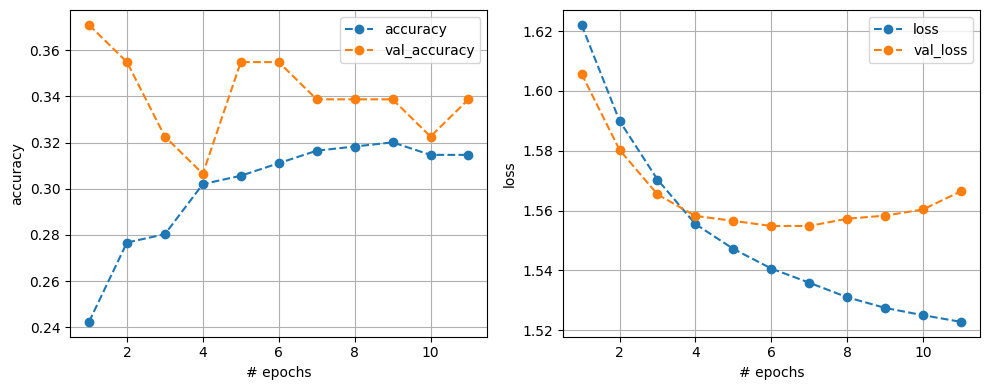

Tiempo requerido: 6.41 segundos.
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.3081 - loss: 1.5215 - val_accuracy: 0.3387 - val_loss: 1.5665 - learning_rate: 0.0010
Epoch 11: early stopping
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
***
[[0.17614114 0.23517153 0.22044082 0.2058594  0.16238715]
 [0.10602698 0.14092098 0.18450463 0.2386501  0.32989734]
 [0.16083367 0.24316046 0.19398767 0.19735092 0.20466726]
 [0.19055116 0.1583347  0.12868688 0.1571617  0.36526555]
 [0.15665045 0.19787323 0.17067388 0.18872963 0.28607276]
 [0.19276507 0.26112527 0.19619657 0.17988762 0.17002547]
 [0.13405658 0.2787052  0.17891833 0.17632855 0.23199134]
 [0.18899398 0.1672927  0.15552275 0.19736649 0.29082412]
 [0.25233224 0.20385927 0.16688463 0.17749012 0.19943373]
 [0.24501222 0.20165424 0.16074695 0.16010478 0.23248175]
 [0.27543342 0.16193542 0.14808623 0.16028996 0.25425497]
 [0.25377864 0.22673853 0.16045196 0.16188341 0.19714747]
 [0.47488418 0.21624263 0.12800997 0.09569929 0.085164  ]
 [0.200

C:\Users\Casa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Casa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Casa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [48]:
import numpy as np
import pandas as pd


n_folds = CV

# Entrenar el modelo
simple_rnn_trained = model_srnn.fit(X_train, y_train, epochs=50, batch_size=128, validation_data= (X_val, y_val), callbacks=[early_stopping, plot_learning, timer_callback, reduce_rl, model_checkpoint])

y_pred = model_srnn.predict(X_val)
print('***')
print(y_pred)
print('***')
y_pred_classes = np.argmax(y_pred, axis=1)
print (y_pred_classes)
print('***')

# Calcula la precisión
accuracy = accuracy_score(y_val, y_pred_classes)
print("Accuracy:", accuracy)

# Muestra el informe de clasificación
print("Classification Report:")
print(classification_report(y_val, y_pred_classes))

# Muestra la matriz de confusión
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred_classes))   
    
    

 
print('********************************************************')




3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3614 - loss: 1.5031 
Loss: 1.5113416910171509
Accuracy: 0.3478260934352875


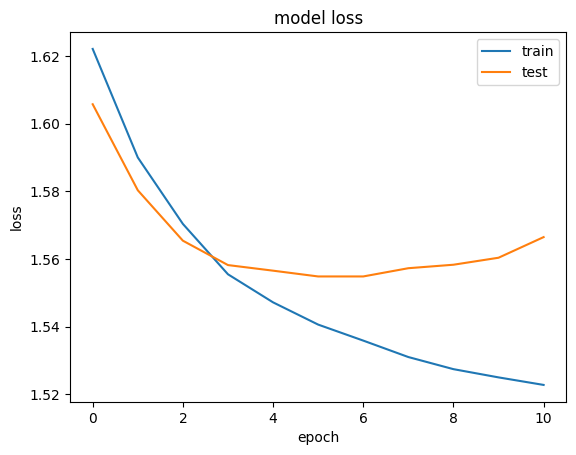

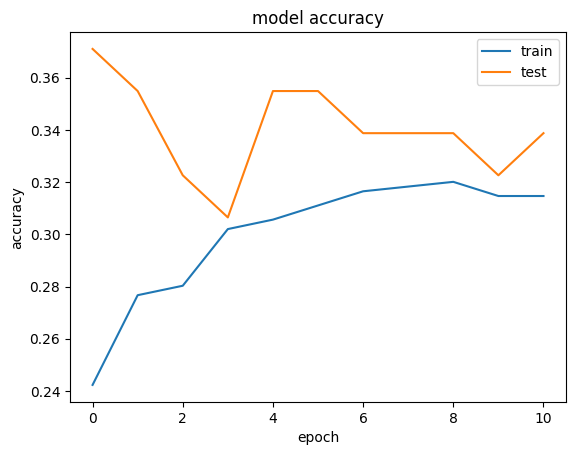

In [49]:
simple_rnn_loss, simple_rnn_accuracy = model_srnn.evaluate(X_test, y_test)
print(f'Loss: {simple_rnn_loss}')
print(f'Accuracy: {simple_rnn_accuracy}')

print_chart("model loss", "epoch", "loss", [simple_rnn_trained.history['loss'], simple_rnn_trained.history['val_loss']], ['train', 'test'])
print_chart("model accuracy", "epoch", "accuracy", [simple_rnn_trained.history['accuracy'], simple_rnn_trained.history['val_accuracy']], ['train', 'test'])


# LSTM (Long short-term memory)

In [72]:
import numpy as np
from timeit import default_timer as timer
import matplotlib.pyplot as plt
import pickle
from IPython.display import clear_output

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, GRU, Dropout, Flatten
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, Callback, ModelCheckpoint

from tensorflow.keras.layers import Reshape, GlobalMaxPool1D, TimeDistributed, Input
from tensorflow.keras.models import Model, load_model

In [156]:
experimento_1_nor_scaler = pd.read_csv('../datos/experimento_stscaler_1.csv', sep=',')
experimento_1_scaler = experimento_1_nor_scaler.drop(['Timestamp'], axis=1)
X_train, y_train, X_val, y_val, X_test, y_test = dividir_datos(experimento_1_scaler)


X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_val = X_val.reshape((X_val.shape[0], 1, X_val.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))


In [157]:
# Definición del modelo
lstm_model = Sequential()
lstm_model.add(LSTM(units=64, input_shape=(experimento_1_nor_scaler.shape[0], 10), return_sequences=True))
lstm_model.add(LSTM(units=32))
lstm_model.add(Dense(64, activation='relu'))
lstm_model.add(Dense(64, activation='relu'))
lstm_model.add(Dropout(0.2, input_shape=(64,)))
lstm_model.add(Dense(5, activation='softmax'))

# Compilación del modelo
lstm_model.compile(optimizer='adam', metrics=['accuracy'], loss='sparse_categorical_crossentropy')

# Se imprime el resumen del modelo
lstm_model.summary()

C:\Users\Casa\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\Casa\anaconda3\Lib\site-packages\keras\src\layers\regularization\dropout.py:42: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_52 (LSTM)                       │ (None, 130, 64)             │          19,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_53 (LSTM)                       │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 38,213 (149.27 KB)

 Trainable params: 38,213 (149.27 KB)

 Non-trainable params: 0 (0.00 B)

In [158]:
# Definir early stopping
early_stopping_lstm = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
plot_learning_lstm = PlotLearning()
timer_callback_lstm = TimerCallback()
reduce_rl_lstm = ReduceLROnPlateau(patience=5, monitor='loss')
model_checkpoint_lstm = ModelCheckpoint('weights/lstm.keras', monitor='val_loss', save_best_only=True)

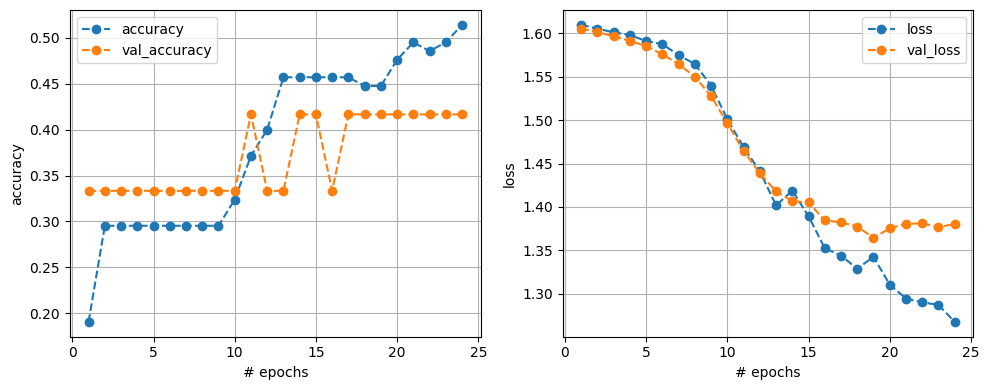

Tiempo requerido: 14.10 segundos.
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.5019 - loss: 1.2681 - val_accuracy: 0.4167 - val_loss: 1.3806 - learning_rate: 0.0010
Epoch 24: early stopping


In [159]:
# Se entrena el modelo
lstm_model_trained = lstm_model.fit(X_train, y_train, epochs=500, batch_size=16, validation_data=(X_val, y_val), callbacks=[early_stopping_lstm,plot_learning_lstm,timer_callback_lstm,reduce_rl_lstm,model_checkpoint_lstm])